In [0]:
!pip install torch torchvision

    100% |████████████████████████████████| 519.5MB 30kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x58892000 @  0x7fd2b17a42a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 21.1MB/s 
    100% |████████████████████████████████| 2.0MB 4.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [2]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x573d6000 @  0x7fccda24f2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


# Loading Dataset

In [4]:


train_dataset = dsets.MNIST(root='C:\\Users\Dharmik\Desktop\Handwritten digits', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='C:\\Users\Dharmik\Desktop\Handwritten digits', 
                           train=False, 
                           transform=transforms.ToTensor(),download=True)


Processing...
Done!


In [0]:
# defining hyperparameters

input_size=784
output_size=10
learning_rate=0.01
batch_size=100
n_iters=3000
total_size=len(train_dataset)
epochs=int((n_iters*batch_size)/total_size)

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

In [7]:
#visualizing the dataset 
print(train_dataset[0][0].size())
print(train_dataset[0][0].numpy().shape)

torch.Size([1, 28, 28])
(1, 28, 28)


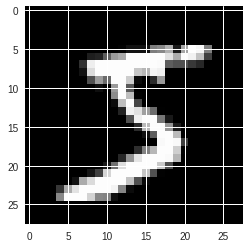

In [8]:
img=train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(img,cmap ='gray')

#Making the dataset iterable 

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

#Creating model class 

In [0]:
class LogisticRegressionModel(nn.Module):
  def __init__(self,input_size,output_size):
    super(LogisticRegressionModel,self).__init__()
    self.linear=nn.Linear(input_size,output_size)
  def forward(self, x):
    out=self.linear(x)
    return out
 

#Instantiating model class 

In [36]:
model=LogisticRegressionModel(input_size,output_size)


#defining loss function
criterion=nn.CrossEntropyLoss()

#defining optimizer
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
iters=0
#training model
for i in range(epochs):
  for i,(images,labels) in enumerate(train_loader):
    images=Variable(images.view(-1,784))
    labels=Variable(labels)
  
  
    optimizer.zero_grad()           #clearing gradients buffers
    outputs=model(images)  
    loss=criterion(outputs,labels)  #calculating losses
    loss.backward()                 #calculating gradients 
    optimizer.step()                #updating parameters 
    iters+=1
    if iters % 500==0:
      correct = 0
      total = 0
      for images, labels in test_loader:
        images = Variable(images.view(-1, 784))
        outputs = model(images)
        _,predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
      print('Iteration:{}       Accuracy:{}% '.format(iters,100 * correct / total))
  
  

Iteration:500       Accuracy:84% 
Iteration:1000       Accuracy:87% 
Iteration:1500       Accuracy:88% 
Iteration:2000       Accuracy:88% 
Iteration:2500       Accuracy:88% 
Iteration:3000       Accuracy:89% 
